In [238]:
import numpy as np
import pandas as pd
import multiprocessing as mp
import os
import threading
import time
import matplotlib.pyplot as plt

In [239]:
numOfCores=mp.cpu_count()
print("Number of Cores are",numOfCores)

Number of Cores are 12


In [240]:
numMat=200
matrices=[]
rows,cols=1000,1000
for i in range(numMat):
    matrices.append(np.random.rand(rows,cols))
constMat=np.random.rand(rows,cols)

In [241]:
def matMul(matrices,conMat):
    for mat in matrices:
        res=np.dot(mat,conMat)
    return

def task(numThread,matrices,conMat):
    start_time=time.time()
    threads=[]
    split=int(len(matrices)/numThread)
    for i in range(0,numThread):
        thread=threading.Thread(target=matMul,args=(matrices[i*split:((i+1)*split)-1],conMat))
        threads.append(thread)
        thread.start()
    for thread in threads:
        thread.join()
    end_time=time.time()
    return end_time-start_time

,Time Taken (s)
Threads,
1,2.666345
2,2.408884
3,2.530591
4,2.476819
5,2.530085
6,2.536103
7,2.616263
8,2.606875
9,2.488660


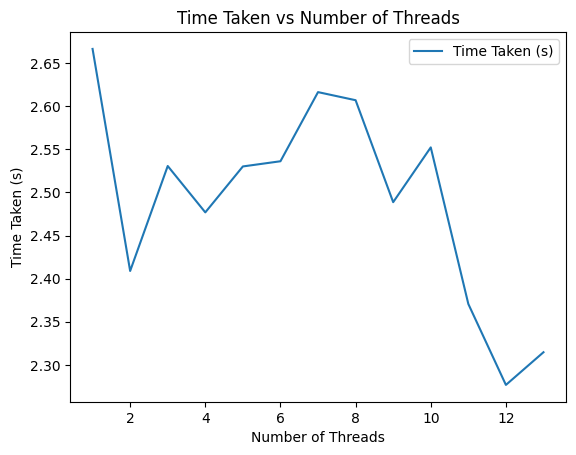

In [242]:
d={}
for num_threads in range(1,14):
    thread_time=task(num_threads,matrices,constMat)
    d[num_threads]=thread_time
df=pd.DataFrame.from_dict(d,orient='index',columns=['Time Taken (s)'])
df['Threads']=[1,2,3,4,5,6,7,8,9,10,11,12,13]
column_to_move=df.pop("Threads")
df.insert(0,"Threads",column_to_move)
df.set_index('Threads',inplace=True)
display(df)
df.plot()
plt.xlabel('Number of Threads')
plt.ylabel('Time Taken (s)')
plt.title('Time Taken vs Number of Threads')
plt.show()